In [3]:
from sklearn import datasets as ds
import pandas as pd
import numpy as np
import os, os.path
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import colorsys
from PIL import Image

from sklearn.decomposition import KernelPCA
import zipfile

import skimage
from skimage import io

from skimage.transform import resize
from random import shuffle


In [4]:
with zipfile.ZipFile('train/ALLL/ALL.zip', 'r') as zf:
        zf.extractall('train/ALLL/')
        zf.close()

In [5]:
import glob2
from PIL import Image
import matplotlib.image as mpimg

#albacore_image_files = glob.glob('train/BET/*.jpg')
fish_image_files = glob2.glob('train/**/*.jpg')
shuffle(fish_image_files)
files_subset = fish_image_files[:1000]
# print(image_files)
albacore_image_list = []
size = 300, 300

# for filename in albacore_image_files:
#     image=Image.open(filename).resize(size)
#     albacore_image_list.append(image)
# albacore_image_list

In [6]:
files_subset

['train/NoF/img_00413.jpg',
 'train/ALL/img_04296.jpg',
 'train/ALB/img_01641.jpg',
 'train/ALL/img_03918.jpg',
 'train/ALL/img_01445.jpg',
 'train/ALL/img_04968.jpg',
 'train/YFT/img_04472.jpg',
 'train/ALL/img_07901.jpg',
 'train/ALL/img_07486.jpg',
 'train/ALL/img_01693.jpg',
 'train/OTHER/img_00721.jpg',
 'train/DOL/img_00689.jpg',
 'train/ALL/img_02068.jpg',
 'train/ALL/img_01460.jpg',
 'train/ALB/img_07836.jpg',
 'train/NoF/img_03849.jpg',
 'train/ALL/img_02829.jpg',
 'train/ALB/img_00209.jpg',
 'train/ALL/img_02032.jpg',
 'train/NoF/img_01383.jpg',
 'train/ALB/img_01454.jpg',
 'train/YFT/img_07571.jpg',
 'train/BET/img_01350.jpg',
 'train/NoF/img_01071.jpg',
 'train/ALL/img_02748.jpg',
 'train/ALB/img_03927.jpg',
 'train/ALB/img_04981.jpg',
 'train/ALL/img_06344.jpg',
 'train/ALL/img_04235.jpg',
 'train/ALL/img_05110.jpg',
 'train/ALB/img_03990.jpg',
 'train/ALL/img_07195.jpg',
 'train/ALL/img_07584.jpg',
 'train/ALB/img_00208.jpg',
 'train/ALL/img_06213.jpg',
 'train/ALL/img_02

In [7]:
igs = np.array([skimage.transform.resize(skimage.io.imread(fname, as_grey=True, plugin=None, flatten=None),(300,300))
                                         for fname in files_subset])

In [104]:
igs_sk.shape

(200, 300, 300)

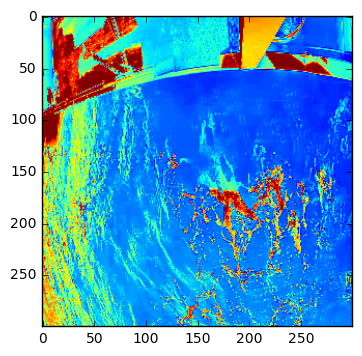

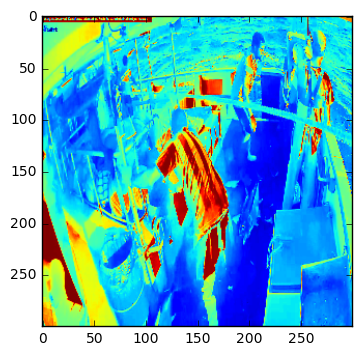

In [8]:
for i in range(0,2):
    plt.imshow(igs[i])
    plt.show()

In [106]:
print(type(igs))
print(igs[0].shape)
igs[0].size

<class 'numpy.ndarray'>
(300, 300)


90000

In [107]:
igs[0].shape

(300, 300)

In [117]:
igs.shape[0]

200

In [9]:
train_data = igs.astype('float32')
train_data = train_data / 255
print(train_data.shape)
igs_pca = train_data.reshape(igs.shape[0], (train_data.shape[1]*train_data.shape[2]))


(1000, 300, 300)


In [119]:
igs_pca.shape

(200, 90000)

In [10]:
n_components = 50
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, igs.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15) # very sensitive to the gamma parameter
%time kpca.fit(igs_pca)


Extracting the top 50 eigenfaces from 1000 faces
CPU times: user 6.64 s, sys: 380 ms, total: 7.02 s
Wall time: 2.38 s


KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=50,
     remove_zero_eig=False, tol=0)

In [26]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 173
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, igs_pca.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(igs_pca)
eigenfaces = pca.components_.reshape((n_components, train_data.shape[1]*train_data.shape[2]))

Extracting the top 173 eigenfaces from 1000 faces
CPU times: user 21.7 s, sys: 975 ms, total: 22.7 s
Wall time: 6.71 s


In [12]:
pca.components_.shape

(50, 90000)

In [16]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

In [27]:
plot_explained_variance(pca)

In [28]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods
X = igs_pca
n_samples, n_features = igs_pca.shape
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct]))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct]))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_kpca.reshape((train_data.shape[1], train_data.shape[2])), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    plt.show()


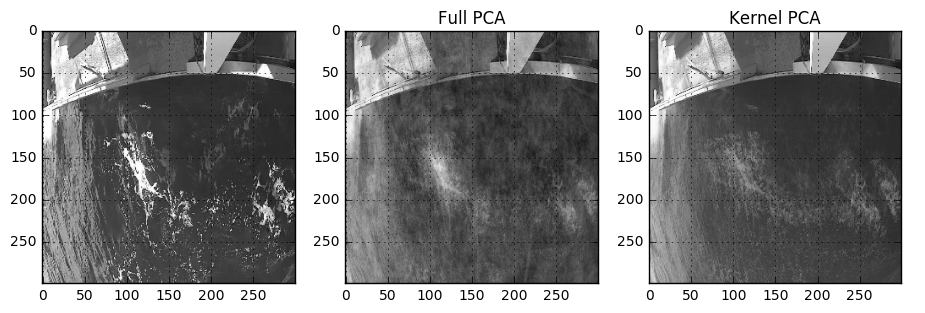

In [29]:
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning:

Low image dynamic range; displaying image with stretched contrast.



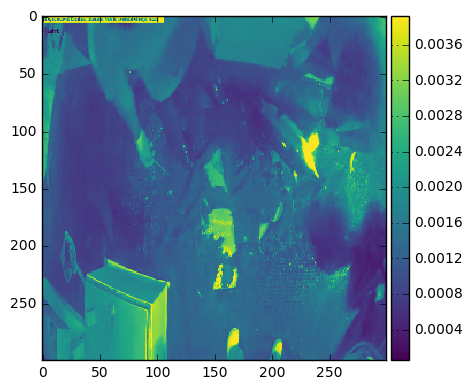

In [31]:
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((train_data.shape[1], train_data.shape[2]))
imshow(img)
plt.grid()
plt.show()

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning:

Low image dynamic range; displaying image with stretched contrast.



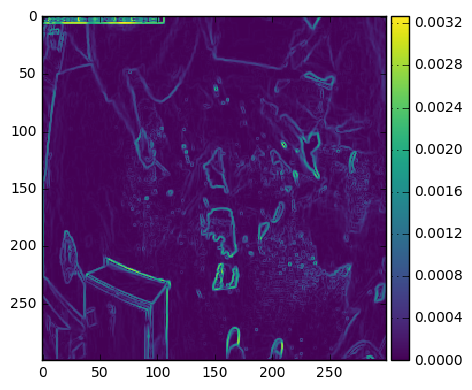

In [32]:
from skimage.filters import sobel_h, sobel_v

gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()
plt.show()

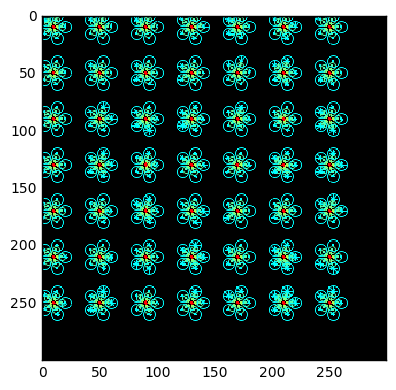

In [33]:
from skimage.feature import daisy

# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img,step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()
plt.show()

In [34]:
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(28, 28, 72)
56448


In [35]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(train_data.shape[1], train_data.shape[2]))
test_feature.shape

CPU times: user 104 ms, sys: 19.8 ms, total: 124 ms
Wall time: 123 ms


(81536,)

In [36]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X))

gabr_feature = compute_gabor(X[idx_to_reconstruct], kernels, ((train_data.shape[1], train_data.shape[2])))
gabr_feature

array([  1.60301954e-03,   1.14249099e-06,   4.13844764e-01,
        -1.28376108e+00,   4.90051694e-04,   1.22924703e-07,
         4.15933430e-01,  -1.21443062e+00,   1.08134537e-03,
         4.71917929e-07,   3.82212132e-01,  -1.24973549e+00,
         1.61296612e-06,   2.26621832e-09,   4.42765765e-02,
         2.26523879e+01,   1.60303374e-03,   1.14199406e-06,
         4.13917303e-01,  -1.28353163e+00,   4.90738254e-04,
         1.17670851e-07,   4.23774272e-01,  -1.28026830e+00,
         1.09070982e-03,   4.72434238e-07,   3.79897207e-01,
        -1.25432079e+00,   2.59789005e-07,   5.99040040e-10,
         2.98329499e-02,   1.80238816e+01,   1.60301954e-03,
         1.14204443e-06,   4.14035797e-01,  -1.28329232e+00,
         4.90051752e-04,   1.20105980e-07,   4.12966818e-01,
        -1.26435876e+00,   1.08134537e-03,   4.67507846e-07,
         3.88924360e-01,  -1.24409577e+00,   1.61296612e-06,
         1.76034909e-09,   2.68559363e-02,   8.22482734e+00,
         1.60303374e-03,

In [37]:
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (train_data.shape[1], train_data.shape[2]))
print(daisy_features.shape)

CPU times: user 1min 43s, sys: 16.4 s, total: 1min 59s
Wall time: 1min 59s
(1000, 81536)


In [38]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 2.79 s, sys: 94.7 ms, total: 2.88 s
Wall time: 857 ms


/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning:

Low image dynamic range; displaying image with stretched contrast.



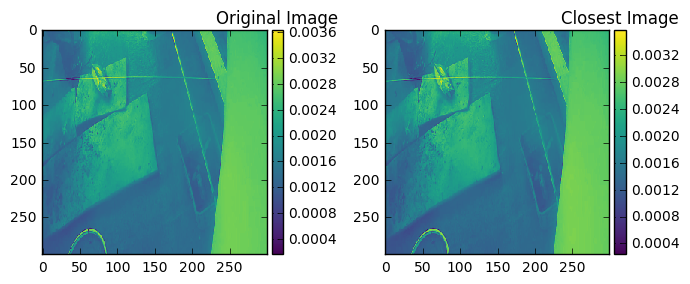

In [39]:
import copy
# find closest image to current image
idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((train_data.shape[1], train_data.shape[2])))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((train_data.shape[1], train_data.shape[2])))
plt.title("Closest Image")
plt.grid()
plt.show()

In [ ]:
%time gabor_stats = np.apply_along_axis(compute_gabor, 1, X, kernels, ((train_data.shape[1], train_data.shape[2])))
print(gabor_stats.shape)

In [40]:
from ipywidgets import fixed
# put it together inside a nice widget
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X[idx1].reshape((train_data.shape[1], train_data.shape[2])))
    plt.title("Original Image ")
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X[idx2].reshape((train_data.shape[1], train_data.shape[2])))
    plt.title("Closest Image  ")
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X[idx3].reshape((train_data.shape[1], train_data.shape[2])))
    plt.title("Next Closest Image ")
    plt.grid()
    plt.show()
